In [151]:
# load data
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/Users/prateek/anaconda3/envs/AnacondaTest/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [152]:
# a form of summary of the data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

data size =  (506, 13)
target size =  (506,)
feature attributes:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employme

In [153]:
# more details of the data
import pandas as pd
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [154]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [155]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 640x480 with 0 Axes>

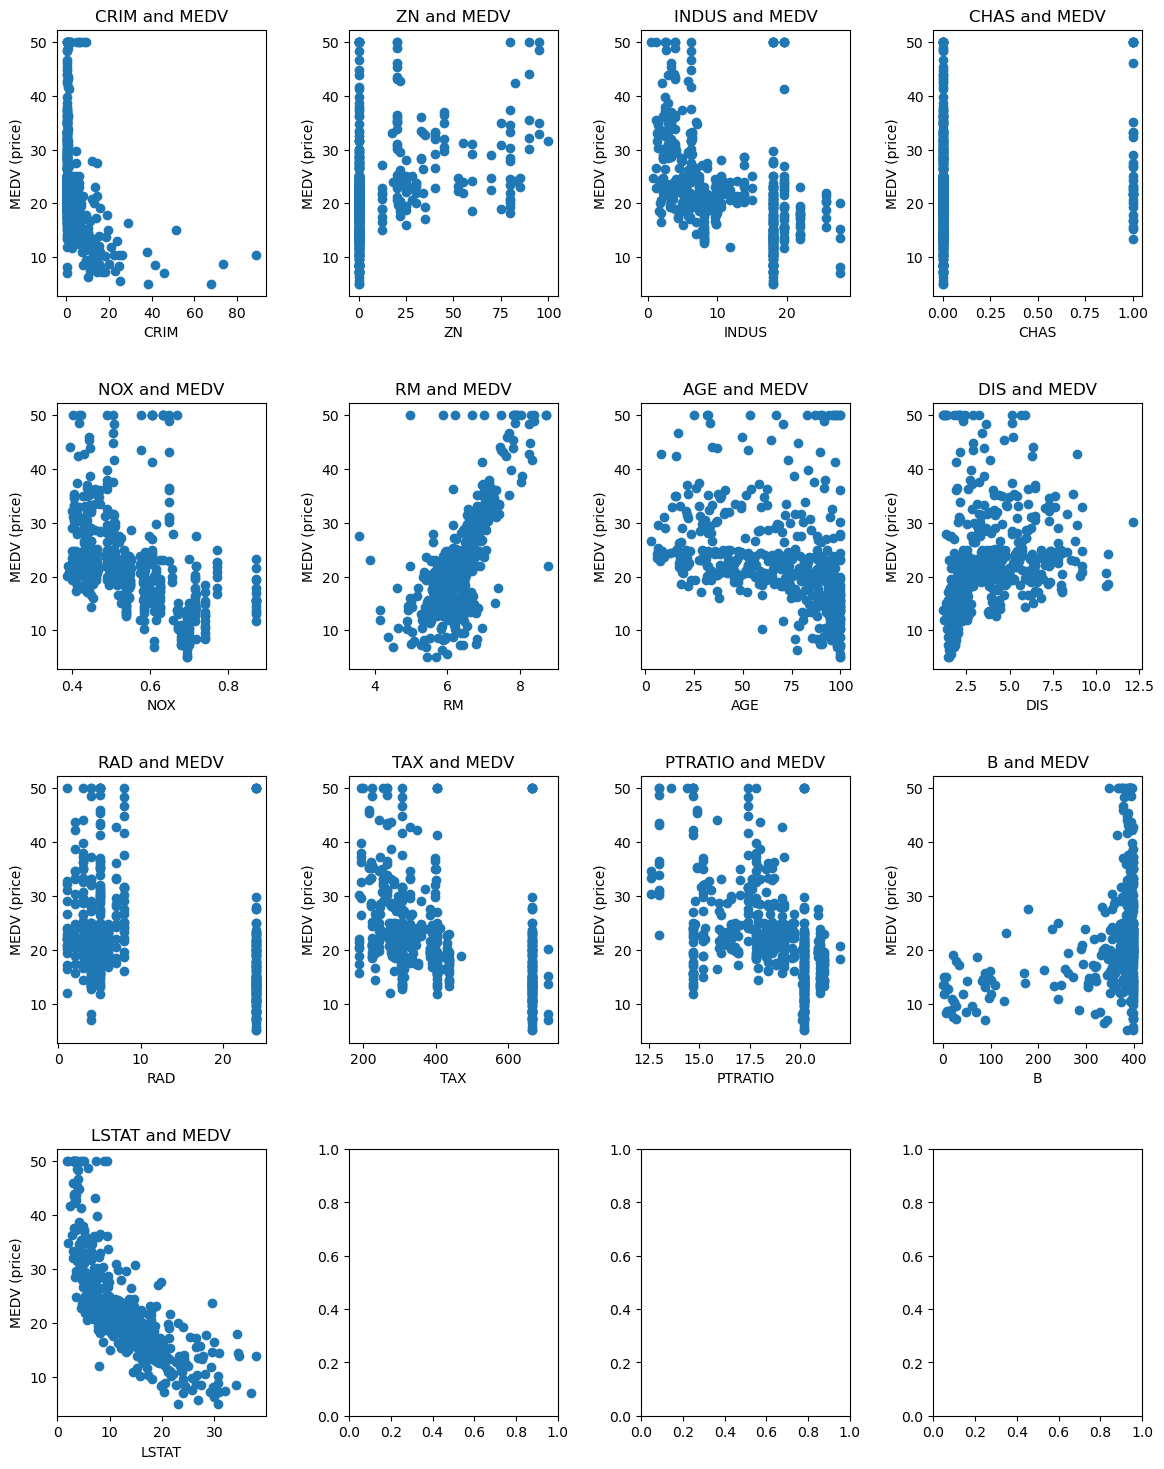

In [156]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

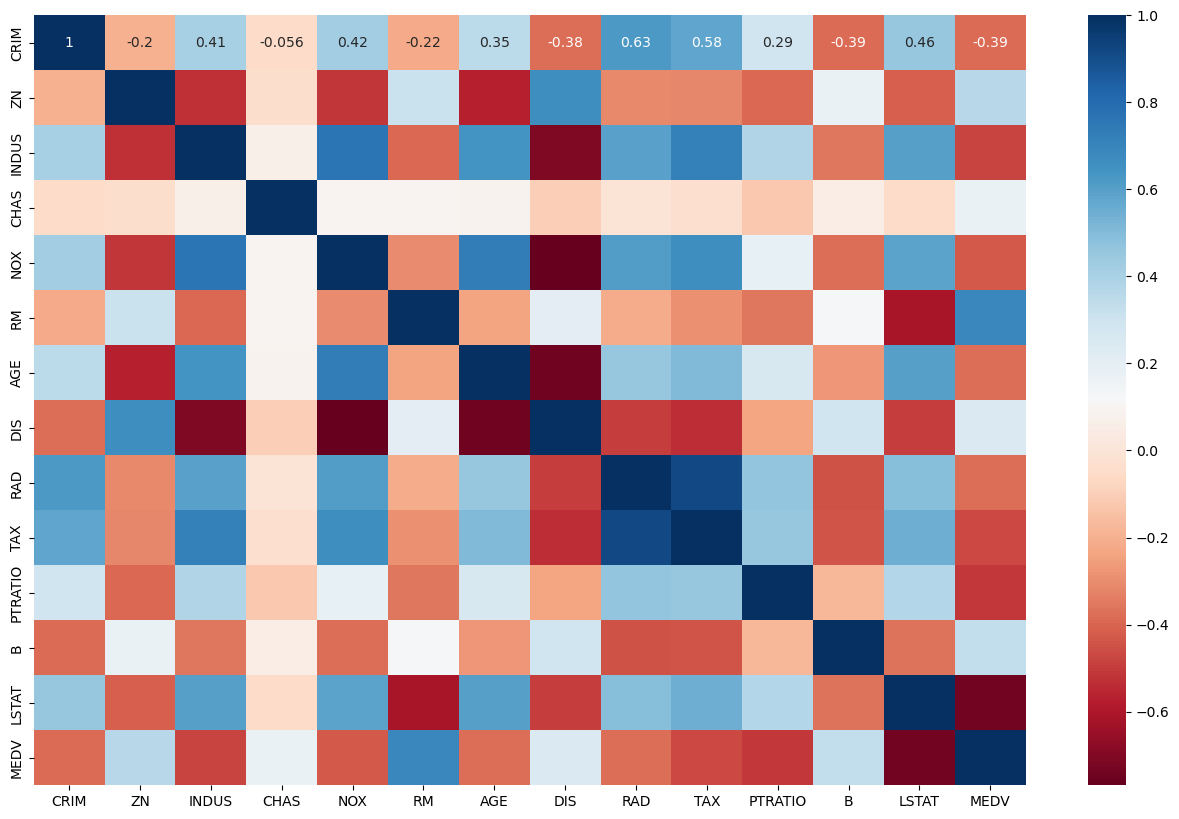

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [157]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [158]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [159]:
# 2.3 linear regression and ridge regression
import numpy as np

def least_square(X, y):
    #TODO
    theta = np.matmul(X.transpose(),X)
    theta = np.linalg.inv(theta)
    theta = np.matmul(theta,X.transpose())
    theta = np.matmul(theta, y)
    return theta

def ridge_reg(X, y, eta):
    #TODO
    theta = np.matmul(X.transpose(),X)
    num_rows, num_columns = theta.shape
    theta = theta + (eta/2)*np.identity(num_rows)
    theta = np.linalg.inv(theta)
    theta = np.matmul(theta,X.transpose())
    theta = np.matmul(theta, y)
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])
print("Linear Regression Output")
display(df_theta)

df_theta_r_temp = df_theta
# apply ridge regression
for i in range(25):
    theta_r = ridge_reg(X_train, y_train, i)
    df_theta_r = pd.DataFrame(zip(boston.feature_names, theta_r),columns=['Feature','Coeff'])
    print("Ridge Regression Output with eta = ", i)
    if(i == 20):
        df_theta_r_temp = df_theta_r
    display(df_theta_r)

# Take eta as 20, for the right balance of training vs testing dataset accuracy
df_theta_r = df_theta_r_temp

Linear Regression Output


,Feature,Coeff
0,CRIM,-0.099324
1,ZN,0.052251
2,INDUS,0.004516
3,CHAS,2.957261
4,NOX,1.127938
5,RM,5.854198
6,AGE,-0.014957
7,DIS,-0.920844
8,RAD,0.159519
9,TAX,-0.008934


Ridge Regression Output with eta =  0


,Feature,Coeff
0,CRIM,-0.099324
1,ZN,0.052251
2,INDUS,0.004516
3,CHAS,2.957261
4,NOX,1.127938
5,RM,5.854198
6,AGE,-0.014957
7,DIS,-0.920844
8,RAD,0.159519
9,TAX,-0.008934


Ridge Regression Output with eta =  1


,Feature,Coeff
0,CRIM,-0.099514
1,ZN,0.052396
2,INDUS,0.005971
3,CHAS,2.901961
4,NOX,0.928628
5,RM,5.852968
6,AGE,-0.014481
7,DIS,-0.920441
8,RAD,0.159970
9,TAX,-0.008921


Ridge Regression Output with eta =  2


,Feature,Coeff
0,CRIM,-0.099660
1,ZN,0.052550
2,INDUS,0.006999
3,CHAS,2.846734
4,NOX,0.810144
5,RM,5.848060
6,AGE,-0.014077
7,DIS,-0.919409
8,RAD,0.160346
9,TAX,-0.008919


Ridge Regression Output with eta =  3


,Feature,Coeff
0,CRIM,-0.099782
1,ZN,0.052709
2,INDUS,0.007809
3,CHAS,2.792744
4,NOX,0.731256
5,RM,5.841327
6,AGE,-0.013709
7,DIS,-0.918069
8,RAD,0.160677
9,TAX,-0.008922


Ridge Regression Output with eta =  4


,Feature,Coeff
0,CRIM,-0.099889
1,ZN,0.052870
2,INDUS,0.008487
3,CHAS,2.740394
4,NOX,0.674718
5,RM,5.833546
6,AGE,-0.013363
7,DIS,-0.916557
8,RAD,0.160976
9,TAX,-0.008926


Ridge Regression Output with eta =  5


,Feature,Coeff
0,CRIM,-0.099986
1,ZN,0.053032
2,INDUS,0.009079
3,CHAS,2.689813
4,NOX,0.632042
5,RM,5.825104
6,AGE,-0.013033
7,DIS,-0.914939
8,RAD,0.161248
9,TAX,-0.008932


Ridge Regression Output with eta =  6


,Feature,Coeff
0,CRIM,-0.100074
1,ZN,0.053194
2,INDUS,0.009608
3,CHAS,2.641017
4,NOX,0.598560
5,RM,5.816216
6,AGE,-0.012713
7,DIS,-0.913252
8,RAD,0.161499
9,TAX,-0.008938


Ridge Regression Output with eta =  7


,Feature,Coeff
0,CRIM,-0.100155
1,ZN,0.053356
2,INDUS,0.010089
3,CHAS,2.593974
4,NOX,0.571497
5,RM,5.807010
6,AGE,-0.012402
7,DIS,-0.911518
8,RAD,0.161731
9,TAX,-0.008945


Ridge Regression Output with eta =  8


,Feature,Coeff
0,CRIM,-0.100231
1,ZN,0.053517
2,INDUS,0.010532
3,CHAS,2.548625
4,NOX,0.549095
5,RM,5.797569
6,AGE,-0.012097
7,DIS,-0.909751
8,RAD,0.161946
9,TAX,-0.008951


Ridge Regression Output with eta =  9


,Feature,Coeff
0,CRIM,-0.100302
1,ZN,0.053679
2,INDUS,0.010943
3,CHAS,2.504903
4,NOX,0.530189
5,RM,5.787950
6,AGE,-0.011799
7,DIS,-0.907961
8,RAD,0.162146
9,TAX,-0.008956


Ridge Regression Output with eta =  10


,Feature,Coeff
0,CRIM,-0.100368
1,ZN,0.053839
2,INDUS,0.011329
3,CHAS,2.462736
4,NOX,0.513974
5,RM,5.778194
6,AGE,-0.011505
7,DIS,-0.906153
8,RAD,0.162332
9,TAX,-0.008962


Ridge Regression Output with eta =  11


,Feature,Coeff
0,CRIM,-0.100431
1,ZN,0.053999
2,INDUS,0.011691
3,CHAS,2.422052
4,NOX,0.499876
5,RM,5.768328
6,AGE,-0.011216
7,DIS,-0.904333
8,RAD,0.162505
9,TAX,-0.008967


Ridge Regression Output with eta =  12


,Feature,Coeff
0,CRIM,-0.100490
1,ZN,0.054158
2,INDUS,0.012033
3,CHAS,2.382781
4,NOX,0.487477
5,RM,5.758376
6,AGE,-0.010930
7,DIS,-0.902504
8,RAD,0.162666
9,TAX,-0.008971


Ridge Regression Output with eta =  13


,Feature,Coeff
0,CRIM,-0.100545
1,ZN,0.054317
2,INDUS,0.012357
3,CHAS,2.344856
4,NOX,0.476462
5,RM,5.748354
6,AGE,-0.010648
7,DIS,-0.900668
8,RAD,0.162816
9,TAX,-0.008975


Ridge Regression Output with eta =  14


,Feature,Coeff
0,CRIM,-0.100598
1,ZN,0.054475
2,INDUS,0.012665
3,CHAS,2.308210
4,NOX,0.466590
5,RM,5.738275
6,AGE,-0.010370
7,DIS,-0.898828
8,RAD,0.162955
9,TAX,-0.008979


Ridge Regression Output with eta =  15


,Feature,Coeff
0,CRIM,-0.100648
1,ZN,0.054632
2,INDUS,0.012958
3,CHAS,2.272783
4,NOX,0.457674
5,RM,5.728152
6,AGE,-0.010094
7,DIS,-0.896985
8,RAD,0.163084
9,TAX,-0.008982


Ridge Regression Output with eta =  16


,Feature,Coeff
0,CRIM,-0.100695
1,ZN,0.054789
2,INDUS,0.013238
3,CHAS,2.238517
4,NOX,0.449568
5,RM,5.717993
6,AGE,-0.009822
7,DIS,-0.895141
8,RAD,0.163205
9,TAX,-0.008985


Ridge Regression Output with eta =  17


,Feature,Coeff
0,CRIM,-0.100740
1,ZN,0.054945
2,INDUS,0.013505
3,CHAS,2.205356
4,NOX,0.442153
5,RM,5.707805
6,AGE,-0.009552
7,DIS,-0.893296
8,RAD,0.163316
9,TAX,-0.008988


Ridge Regression Output with eta =  18


,Feature,Coeff
0,CRIM,-0.100782
1,ZN,0.055100
2,INDUS,0.013761
3,CHAS,2.173249
4,NOX,0.435333
5,RM,5.697594
6,AGE,-0.009285
7,DIS,-0.891451
8,RAD,0.163420
9,TAX,-0.008990


Ridge Regression Output with eta =  19


,Feature,Coeff
0,CRIM,-0.100823
1,ZN,0.055254
2,INDUS,0.014006
3,CHAS,2.142145
4,NOX,0.429030
5,RM,5.687367
6,AGE,-0.009020
7,DIS,-0.889607
8,RAD,0.163516
9,TAX,-0.008991


Ridge Regression Output with eta =  20


,Feature,Coeff
0,CRIM,-0.100861
1,ZN,0.055408
2,INDUS,0.014242
3,CHAS,2.112001
4,NOX,0.423179
5,RM,5.677128
6,AGE,-0.008757
7,DIS,-0.887765
8,RAD,0.163604
9,TAX,-0.008993


Ridge Regression Output with eta =  21


,Feature,Coeff
0,CRIM,-0.100898
1,ZN,0.055561
2,INDUS,0.014468
3,CHAS,2.082771
4,NOX,0.417726
5,RM,5.666881
6,AGE,-0.008497
7,DIS,-0.885925
8,RAD,0.163685
9,TAX,-0.008994


Ridge Regression Output with eta =  22


,Feature,Coeff
0,CRIM,-0.100933
1,ZN,0.055713
2,INDUS,0.014685
3,CHAS,2.054414
4,NOX,0.412625
5,RM,5.656629
6,AGE,-0.008239
7,DIS,-0.884088
8,RAD,0.163760
9,TAX,-0.008994


Ridge Regression Output with eta =  23


,Feature,Coeff
0,CRIM,-0.100966
1,ZN,0.055865
2,INDUS,0.014894
3,CHAS,2.026893
4,NOX,0.407837
5,RM,5.646376
6,AGE,-0.007983
7,DIS,-0.882254
8,RAD,0.163829
9,TAX,-0.008994


Ridge Regression Output with eta =  24


,Feature,Coeff
0,CRIM,-0.100997
1,ZN,0.056015
2,INDUS,0.015095
3,CHAS,2.000170
4,NOX,0.403330
5,RM,5.636124
6,AGE,-0.007729
7,DIS,-0.880422
8,RAD,0.163892
9,TAX,-0.008994


In [160]:
# 2.4 evaluation
def pred_fn(X, theta):
    #TODO
    pred = np.matmul(X, theta)
    return pred

def root_mean_square_error(pred, y):
    #TODO
    diff_matrix = y - pred
    rmse = diff_matrix**2
    rmse = rmse.sum() 
    rmse = rmse/np.size(y)
    rmse = np.sqrt(rmse)
    return rmse

pred_linear_train = pred_fn(X_train,df_theta.loc[:,"Coeff"])
pred_linear_test = pred_fn(X_test,df_theta.loc[:,"Coeff"])
rmse_linear_train = root_mean_square_error(pred_linear_train, y_train)
rmse_linear_test = root_mean_square_error(pred_linear_test, y_test)
print("Training Set RMSE of Linear Regression : ", rmse_linear_train)
print("Testing Set RMSE of Linear Regression : ", rmse_linear_test)

pred_ridge_train = pred_fn(X_train,df_theta_r.loc[:,"Coeff"])
pred_ridge_test = pred_fn(X_test,df_theta_r.loc[:,"Coeff"])
rmse_ridge_train = root_mean_square_error(pred_ridge_train, y_train)
rmse_ridge_test = root_mean_square_error(pred_ridge_test, y_test)
print("Training Set RMSE of Ridge Regression : ", rmse_ridge_train)
print("Testing Set RMSE of Ridge Regression : ", rmse_ridge_test)

Training Set RMSE of Linear Regression :  4.820626531838223
Testing Set RMSE of Linear Regression :  5.209217510530916
Training Set RMSE of Ridge Regression :  4.829777333975097
Testing Set RMSE of Ridge Regression :  5.189347305423606


In [161]:
# 2.5 linear models of top-3 features
X_train_top3 = np.stack((X_train[:,10],X_train[:,5],X_train[:,12])).transpose()
X_test_top3 = np.stack((X_test[:,10],X_test[:,5],X_test[:,12])).transpose()
# linear regression using top-3 features
theta_top3 = least_square(X_train_top3, y_train)
df_theta_top3 = pd.DataFrame(zip(boston.feature_names, theta_top3),columns=['Feature','Coeff'])
pred_linear_train_top3 = pred_fn(X_train_top3,df_theta_top3.loc[:,"Coeff"])
pred_linear_test_top3 = pred_fn(X_test_top3,df_theta_top3.loc[:,"Coeff"])
rmse_linear_train_top3 = root_mean_square_error(pred_linear_train_top3, y_train)
rmse_linear_test_top3 = root_mean_square_error(pred_linear_test_top3, y_test)
print("Training Set RMSE of Linear Regression for top 3 features : ", rmse_linear_train_top3)
print("Testing Set RMSE of Linear Regression for top 3 features : ", rmse_linear_test_top3)
# ridge regression using top-3 features
theta_r_top3 = ridge_reg(X_train_top3, y_train, 20.0)
df_theta_r_top3 = pd.DataFrame(zip(boston.feature_names, theta_r_top3),columns=['Feature','Coeff'])
pred_ridge_train_top3 = pred_fn(X_train_top3,df_theta_r_top3.loc[:,"Coeff"])
pred_ridge_test_top3 = pred_fn(X_test_top3,df_theta_r_top3.loc[:,"Coeff"])
rmse_ridge_train_top3 = root_mean_square_error(pred_ridge_train_top3, y_train)
rmse_ridge_test_top3 = root_mean_square_error(pred_ridge_test_top3, y_test)
print("Training Set RMSE of Ridge Regression for top 3 features and eta = 20.0 : ", rmse_ridge_train_top3)
print("Testing Set RMSE of Ridge Regression for top 3 features and eta = 20.0 : ", rmse_ridge_test_top3)

Training Set RMSE of Linear Regression for top 3 features :  5.273361751695365
Testing Set RMSE of Linear Regression for top 3 features :  5.494723646664577
Training Set RMSE of Ridge Regression for top 3 features and eta = 20.0 :  5.276310228536866
Testing Set RMSE of Ridge Regression for top 3 features and eta = 20.0 :  5.477573443118745
